# 주성분분석(PCA)
* 주성분분석(PCA, Principal Component Analysis)은 고차원 데이터의 차원을 축소하기 위해 사용되는 기법이다.  
* 이 방법은 데이터의 분산을 최대한 보존하면서, 서로 상관 관계가 적은 변수들(주성분)을 찾아낸다. 
* 주성분분석을 통해 데이터를 이해하기 쉽고, 계산 비용을 줄일 수 있다.

## PCA의 원리
- **분산 최대화**: 주성분은 데이터의 분산이 최대가 되는 방향을 찾아낸다.
- **직교성**: 각 주성분은 서로 직교한다는 특성을 가진다.
- **순차적 축소**: 첫 번째 주성분을 찾은 후, 그 방향에 대한 데이터의 투영을 제거하고, 다음 차원에서 또 다시 최대 분산 방향을 찾는다.

In [2]:
# 필요한 라이브러리를 불러온다
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
# 임의의 2D 데이터 생성
np.random.seed(0)
mean = [0, 0]
cov = [[1, 0.8], [0.8, 1]]  # 대각 성분은 분산, 비대각 성분은 공분산
X = np.random.multivariate_normal(mean, cov, 300)

# PCA 모델 생성 및 학습
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [4]:
# 첫 번째 주성분과 두 번째 주성분
first_pc = pca.components_[0]
second_pc = pca.components_[1]

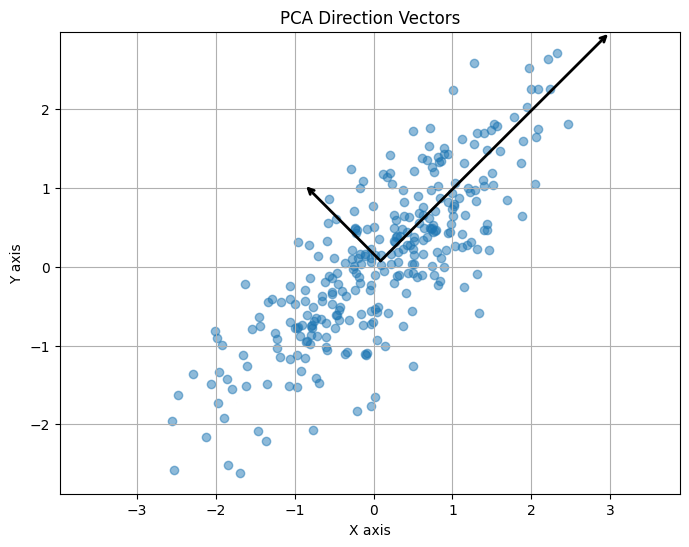

In [5]:
# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    arrowprops=dict(arrowstyle='->',linewidth=2,shrinkA=0, shrinkB=0)
    plt.annotate('', pca.mean_ + v, pca.mean_, arrowprops=arrowprops)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('PCA Direction Vectors')
plt.grid(True)
plt.axis('equal')
plt.show()